In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns

from scipy.signal import savgol_filter

## Milestone 4


<IPython.core.display.Javascript object>


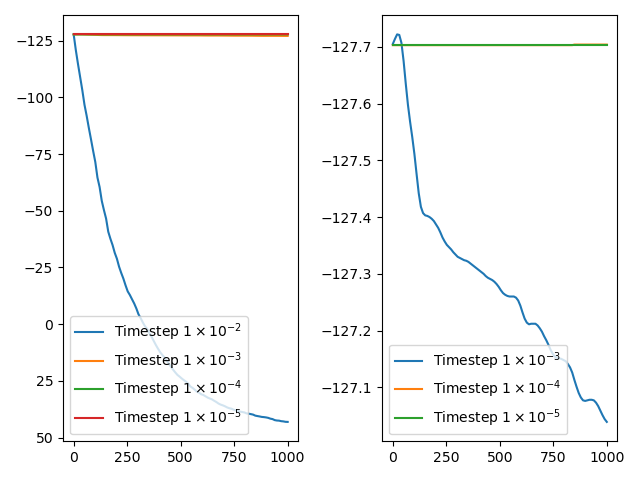

In [56]:
arr = np.loadtxt("../buildDir/milestones/04/plot/energy_0")
lst1 = ['$1 \\times 10^{-2}$','$1\\times10^{-3}$','$1\\times10^{-4}$','$1\\times10^{-5}$']
t = np.linspace(0,1000,len(arr))
fig, ax = plt.subplots(1,2)
ax[0].plot(t,arr, label='Timestep '+lst1[0])
for i in range(1,4,1):
    arr2 = np.loadtxt("../buildDir/milestones/04/plot/energy_"+str(i))
    ax[0].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[0].legend(loc="lower left")
for i in range(1,4,1):
    arr2 = np.loadtxt("../buildDir/milestones/04/plot/energy_"+str(i))
    ax[1].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[1].legend(loc="lower left")
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()

## Milestone 5 + 6


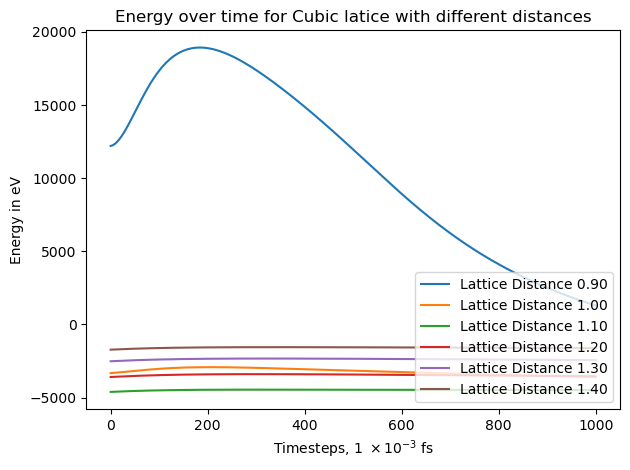

In [3]:
rng = np.array([0.90,1.00,1.10,1.20,1.30,1.40])
fig, ax = plt.subplots()
for i in rng:
    arr2 = np.loadtxt("../buildDir/milestones/05/energy_cubic_big_"+'{:.2f}'.format(i))
    ax.plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Lattice Distance "+'{:.2f}'.format(i))
ax.set_title("Energy over time for Cubic latice with different distances")
ax.legend(loc="lower right")
ax.set_ylabel("Energy in eV")
ax.set_xlabel("Timesteps, $1~\\times 10^{-3}~$fs")
plt.tight_layout()
plt.show()

In [4]:
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
})


data = pd.read_csv("ms5/data")
data = data.query('name.str.contains("/")')
data['range'] = [int(x.split('/')[-1]) for x in data['name']]
data['Benchmark'] = [x.split('/')[0] for x in data['name']]
data['range'] *= data['range']*data['range']

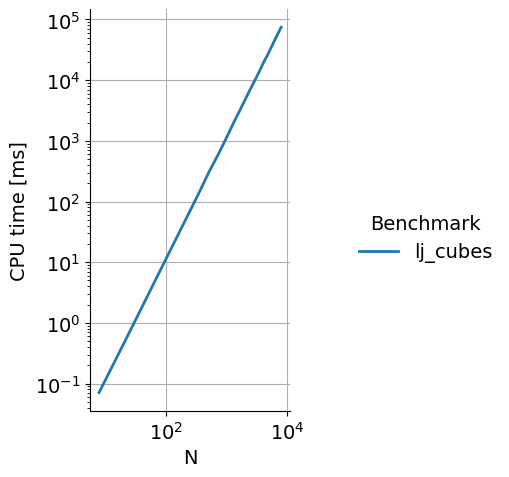

In [5]:
sns.relplot(data=data[0:19],
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

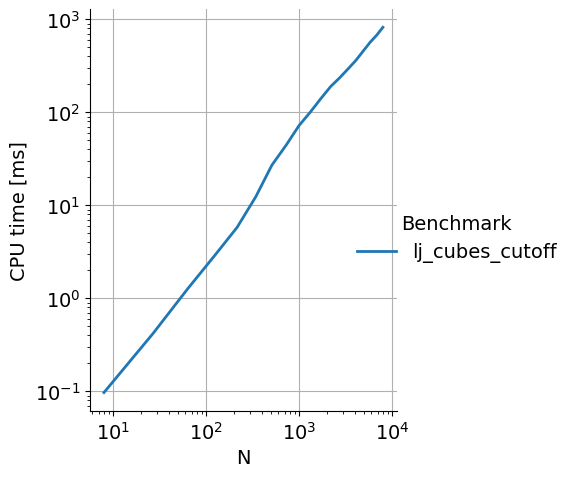

In [6]:
sns.relplot(data=data[19:],
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

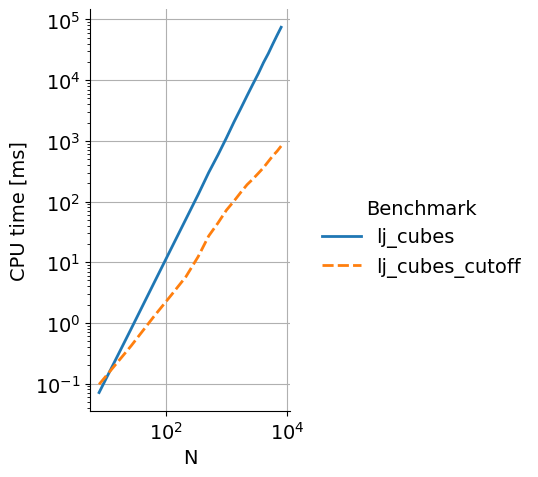

In [7]:
sns.relplot(data=data,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

## Milestone 7


In [8]:
arr = np.fromfile("ms7/e_all_1", sep="\t")
arrs = [arr]
print(len(arr))
lst1 = ["1"]
for i in range(1,32,5):
    arr2 = np.fromfile("ms7/e_all_"+str(i), sep="\t")
    print(len(arr2))
    arrs = np.vstack([arr, arr2])
    lst1.append(str(i))
t = np.linspace(0,100,100)
for i in range(0,6):
    plt.plot(t,arr[i], label="timestep "+lst1[i])
plt.legend()
plt.show()
#print(arr)

FileNotFoundError: [Errno 2] No such file or directory: 'ms7/e_all_1'

<IPython.core.display.Javascript object>


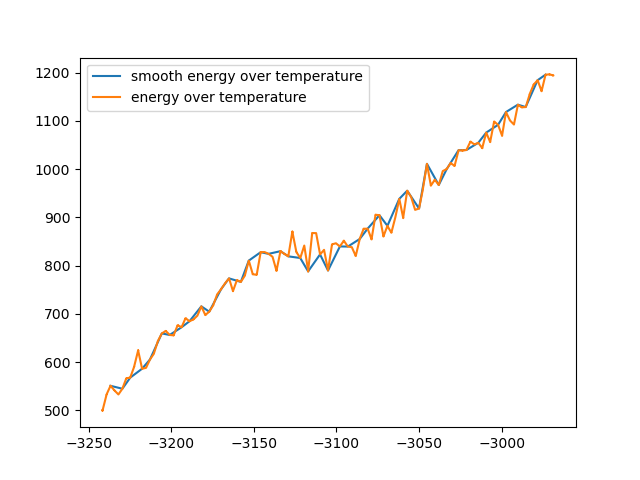

In [57]:
%matplotlib notebook
arr = np.fromfile("ms7/temp", sep="\n")
arr1 = np.fromfile("ms7/temp1", sep="\n")
ener = np.fromfile("ms7/energy", sep="\n")
ener1 = np.fromfile("ms7/energy1", sep="\n")
ener_all = np.concatenate((ener,ener1), axis=0)
temp_all = np.concatenate((arr, arr1), axis=0)


plt.plot(ener1[25::25],arr1[25::25], label="smooth energy over temperature")
plt.plot(ener1,arr1, label="energy over temperature")
plt.legend()
plt.show()
#print(arr)

In [52]:
dedt = 0
for i in range(0,len(ener1)-1,1):
    de = ener1[i+1]-ener1[i]
    dt = arr1[i+1]-arr1[i]
    if(de>0 and dt>0):
        dedt+=de/dt
print(dedt/len(ener1))

dedt1 = 0
for i in range(0,len(ener)-1,1):
    de = ener[i+1]-ener[i]
    dt = arr[i+1]-arr[i]
    if(de>0 and dt>0):
        dedt1+=de/dt
print(dedt1/len(ener))

0.036803044154326454
0.012916568614475092


## Milestone 8


## Milestone 9


In [10]:
s = 15000/10
t = s / 100
print(s)
print(t)
print(s/t)

1500.0
15.0
100.0


In [11]:
s = np.linspace(1,10,10)
t = np.append(s,s, axis=np.newaxis)
print(t)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.  1.  2.  3.  4.  5.  6.  7.  8.
  9. 10.]


In [12]:
s = np.loadtxt("ms4/energy_1")
print(s)

[-127.705 -127.714 -127.722 -127.721 -127.707 -127.675 -127.635 -127.598
 -127.568 -127.541 -127.511 -127.476 -127.442 -127.418 -127.407 -127.403
 -127.402 -127.4   -127.397 -127.393 -127.387 -127.381 -127.373 -127.364
 -127.357 -127.351 -127.347 -127.343 -127.338 -127.334 -127.33  -127.328
 -127.326 -127.324 -127.323 -127.321 -127.318 -127.315 -127.312 -127.309
 -127.306 -127.303 -127.3   -127.296 -127.293 -127.291 -127.289 -127.286
 -127.282 -127.277 -127.271 -127.266 -127.263 -127.261 -127.26  -127.26
 -127.26  -127.258 -127.253 -127.244 -127.232 -127.221 -127.214 -127.211
 -127.212 -127.212 -127.212 -127.209 -127.204 -127.198 -127.19  -127.183
 -127.175 -127.166 -127.159 -127.154 -127.152 -127.151 -127.15  -127.148
 -127.146 -127.141 -127.135 -127.126 -127.113 -127.101 -127.09  -127.082
 -127.077 -127.076 -127.077 -127.078 -127.078 -127.077 -127.073 -127.067
 -127.059 -127.051 -127.044 -127.039]


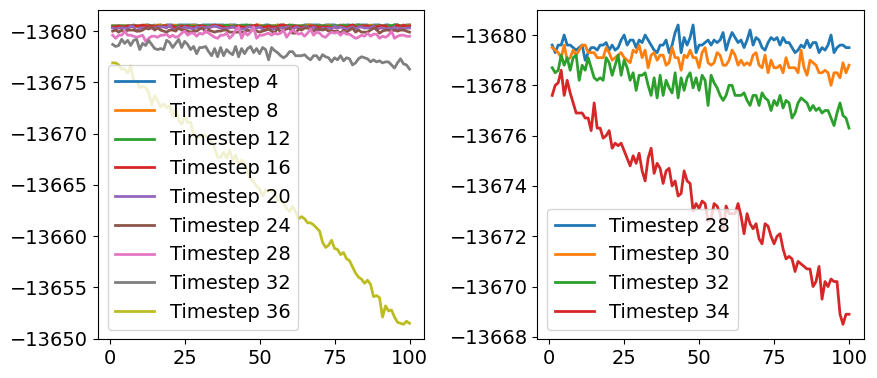

In [23]:
steps = 1000/10
rang = np.arange(2,39,2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
for i in rang:
    if (i%4 == 0):
        time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7/mpi_temp_ener/ener_s_"+str(i), sep="\n")
        ax[0].plot(time,ener, label="Timestep "+str(i))
    if (i>27 and i <36):
        time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7/mpi_temp_ener/ener_s_"+str(i), sep="\n")
        ax[1].plot(time,ener, label="Timestep "+str(i))
ax[1].legend(loc="lower left")
ax[0].legend(loc="lower left")
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.tight_layout()



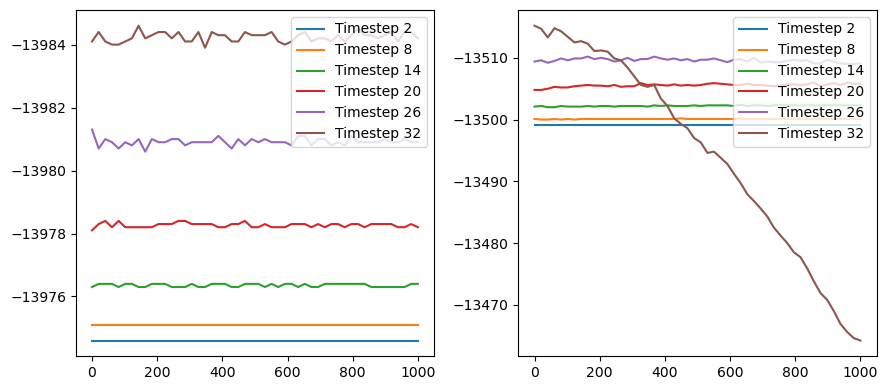

In [36]:
rang = np.arange(2,33,6)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
for i in rang:
        ener = np.fromfile("ms7_parallel/ener_s_600_"+str(i), sep="\n")
        ax[0].plot(np.linspace(0,1000,len(ener)),ener, label="Timestep "+str(i))
        #time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7_parallel/ener_s_1000_"+str(i), sep="\n")
        ax[1].plot(np.linspace(0,1000,len(ener)),ener, label="Timestep "+str(i))
ax[1].legend(loc="upper right")
ax[0].legend(loc="upper right")
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.tight_layout()

In [25]:
arr =np.fromfile("ms9/whisker_smallstress_20_20",sep="\n")

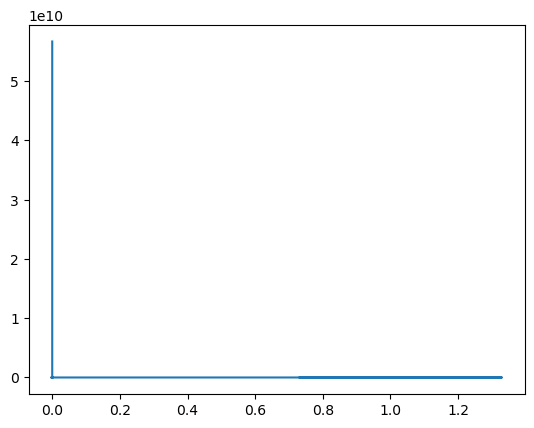

In [32]:
plt.plot(arr[0::2],arr[1::2])